In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None ) #pour afficher toutes les colonnes
pd.set_option('display.max_rows', None ) #pour afficher toutes les lignes

In [3]:
#openFoodFile = pd.read_csv("en.openfoodfacts.org.products.csv", sep='\t', low_memory=False, nrows = 600000 )
openFoodFile = pd.read_csv("en.openfoodfacts.org.products.csv", sep='\t', low_memory=False)
openFoodFile.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,375.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [4]:
openFoodFile.shape

(1630614, 184)

In [5]:
#openFood = openFoodFile.sample(100000) 
openFood = openFoodFile

In [6]:
# pays article
openFood['countries'].value_counts().head(40)

France                    425330
United States             309620
en:fr                     153152
en:es                      91494
en:france                  68865
España                     64331
en:FR                      26933
en:be                      25678
en:ch                      17733
en:Germany                 17576
en:France                  17522
Deutschland                17192
en:United States           15127
en:ca                      15058
en:gb                      14738
en:spain                   14668
Spain                      12755
en:it                      11482
Suisse                     11419
en:us                      11278
en:United Kingdom           9651
United Kingdom              8170
en:BE                       7548
Ireland, Germany            7277
Francia,España              6194
Belgique                    5160
Switzerland                 5136
Germany                     4937
en:de                       4211
Canada                      4098
Frankreich

In [7]:
# on ne ve garder que la France pour l'application
paysFrance = openFood['countries'].str.lower().str.contains('fr', na=False, regex=False)
openFood[paysFrance]['countries'].shape

(770496,)

In [8]:
openFood = openFood[paysFrance]

In [9]:
openFood.info(verbose= True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770496 entries, 0 to 1630613
Data columns (total 184 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    code                                        770496 non-null  object 
 1    url                                         770496 non-null  object 
 2    creator                                     770495 non-null  object 
 3    created_t                                   770496 non-null  int64  
 4    created_datetime                            770496 non-null  object 
 5    last_modified_t                             770496 non-null  int64  
 6    last_modified_datetime                      770496 non-null  object 
 7    product_name                                743218 non-null  object 
 8    abbreviated_product_name                    922 non-null     object 
 9    generic_name                                74043 non-nu

In [10]:
openFood.loc[:,'created_t'] = pd.to_datetime(openFood['created_t'], unit='s')
openFood.loc[:,'last_modified_t'] = pd.to_datetime(openFood['last_modified_t'], unit='s')
openFood.loc[:,'created_datetime'] = pd.to_datetime(openFood['created_datetime'])
openFood.loc[:,'last_modified_datetime'] = pd.to_datetime(openFood['last_modified_datetime'])

C:\Users\paps\anaconda3\envs\openclass\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [11]:
openFood.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-06-15 10:38:00,2018-06-15 10:38:00+00:00,2019-06-25 11:55:18,2019-06-25 11:55:18+00:00,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,375.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [12]:
openFood.shape

(770496, 184)

In [13]:
#on supprime les lignes avec des incoherences dans le rapport kj/kcal qui doit etre de 4.18, donc si <3 on elimine
filter_energy=openFood['energy-kj_100g']/openFood['energy-kcal_100g']<3
index_energy = openFood[filter_energy]
openFood = openFood.drop(index_energy.index)

In [14]:
openFood.shape

(770051, 184)

In [15]:
#on complete la colonne kj à partir de la colonne kcal pour l'energie
openFood['energy-kj_100g'].fillna(openFood['energy-kcal_100g']*4.182, inplace=True)

In [16]:
openFood.describe()

,cities,allergens_en,serving_quantity,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutriscore_score,nova_group,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,0.0,0.0,75639.000000,0.0,238210.000000,238210.000000,0.0,238210.000000,0.0,268903.000000,199234.000000,5.991840e+05,5.614060e+05,5.993980e+05,132.000000,593470.000000,5.959030e+05,1.00000,1.0,1.0,0.0,6.000000,0.0,1.0,2.000000,26.000000,11.000000,0.0,1.0,3.000000,1.00,3078.000000,3108.000000,1316.000000,328.000000,6.200000e+01,97.000000,281.000000,202.000000,30.000000,4.000000,0.0,43.000000,17.000000,0.0,1.0,0.0,1.000000e+00,0.0,3628.000000,3662.000000,593252.000000,594718.000000,23.000000,2.600000e+01,51.000000,227.000000,8.000000,3.000000e+01,285.000000,744.000000,136819.000000,185.000000,178.000000,595467.000000,38.000000,28.000000,13.000000,581734.000000,581733.000000,8.616000e+03,3360.000000,48.000000,1.570000e+03,1746.000000,172.000000,4766.000000,2155.000000,1762.000000,1749.000000,1944.000000,1418.000000,235.000000,1.552000e+03,395.000000,903.000000,78.000000,230.000000,2657.000000,421.000000,8250.000000,1601.000000,5252.000000,2446.000000,921.000000,368.000000,384.000000,1.940000e+02,273.000000,47.000000,42.000000,337.000000,103.000000,55.000000,126.000000,6276.000000,308.000000,10460.000000,296.000000,4380.000000,2.000000,313.000000,11258.000000,268903.000000,0.0,4.000000,0.0,32.000000,29.000000,17.000000,25.000000,14.000000
mean,NaN,NaN,121.595166,NaN,1.596310,0.049183,NaN,0.114441,NaN,9.513036,3.413353,7.095423e+04,1.809044e+04,7.096295e+04,402.340909,14.150345,2.282251e+08,0.00682,48.0,97.0,NaN,31.911955,NaN,6.0,2.100000,3.833892,1.370247,NaN,0.0,77.200000,4.67,20.941116,9.753961,3.393981,2.201517,1.594983e+36,0.755201,16.834161,3.683328,0.550086,0.823750,NaN,44.112453,35.614794,NaN,33.0,NaN,6.100000e-07,NaN,0.034015,0.055843,27.232902,13.830548,18.152175,1.443692e+01,29.596278,8.533040,13.187515,6.528535e+00,33.496140,44.198372,3.012958,2.005405,4.243596,

In [17]:
openFood.notna().mean(axis=0)*100

code                                          100.000000
url                                           100.000000
creator                                        99.999870
created_t                                     100.000000
created_datetime                              100.000000
last_modified_t                               100.000000
last_modified_datetime                        100.000000
product_name                                   96.458157
abbreviated_product_name                        0.119732
generic_name                                    9.597806
quantity                                       33.031838
packaging                                      21.955559
packaging_tags                                 21.954130
packaging_text                                  0.145315
brands                                         53.474900
brands_tags                                    53.470095
categories                                     44.777164
categories_tags                

In [18]:
# on supprime les colonnes sans donnees
openFood = openFood.dropna(axis='columns', how='all')

In [19]:
list(openFood.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'abbreviated_product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'origins_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutriscore_score',
 'nutriscore_grade',
 '

In [20]:
# recherche colonne > 100 g
#openFood.drop()
index_100 = openFood[(openFood[['fat_100g',
 'saturated-fat_100g',
 '-butyric-acid_100g',
 '-caproic-acid_100g',
 '-caprylic-acid_100g',
 '-lauric-acid_100g',
 '-arachidic-acid_100g',
 '-behenic-acid_100g',
 '-cerotic-acid_100g',
 '-montanic-acid_100g',
 '-melissic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 '-alpha-linolenic-acid_100g',
 '-eicosapentaenoic-acid_100g',
 '-docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 '-linoleic-acid_100g',
 '-arachidonic-acid_100g',
 '-gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 '-oleic-acid_100g',
 '-gondoic-acid_100g',
 '-erucic-acid_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 '-sucrose_100g',
 '-glucose_100g',
 '-fructose_100g',
 '-lactose_100g',
 '-maltose_100g',
 '-maltodextrins_100g',
 'starch_100g',
 'polyols_100g',
 'fiber_100g',
 '-soluble-fiber_100g',
 '-insoluble-fiber_100g',
 'proteins_100g',
 'casein_100g',
 'serum-proteins_100g',
 'nucleotides_100g',
 'salt_100g',
 'sodium_100g',
 'alcohol_100g',
 'vitamin-a_100g',
 'beta-carotene_100g',
 'vitamin-d_100g',
 'vitamin-e_100g',
 'vitamin-k_100g',
 'vitamin-c_100g',
 'vitamin-b1_100g',
 'vitamin-b2_100g',
 'vitamin-pp_100g',
 'vitamin-b6_100g',
 'vitamin-b9_100g',
 'folates_100g',
 'vitamin-b12_100g',
 'biotin_100g',
 'pantothenic-acid_100g',
 'silica_100g',
 'bicarbonate_100g',
 'potassium_100g',
 'chloride_100g',
 'calcium_100g',
 'phosphorus_100g',
 'iron_100g',
 'magnesium_100g',
 'zinc_100g',
 'copper_100g',
 'manganese_100g',
 'fluoride_100g',
 'selenium_100g',
 'chromium_100g',
 'molybdenum_100g',
 'iodine_100g',
 'caffeine_100g',
 'taurine_100g',
 'ph_100g',
 'fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-dried_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'collagen-meat-protein-ratio_100g',
 'cocoa_100g',
 'chlorophyl_100g',
 'carbon-footprint_100g',
 'carbon-footprint-from-meat-or-fish_100g',
 'nutrition-score-fr_100g',
 'glycemic-index_100g',
 'choline_100g',
 'phylloquinone_100g',
 'beta-glucan_100g',
 'inositol_100g',
 'carnitine_100g']] > 100).any(axis=1)].index

In [21]:
openFood = openFood.drop(index_100)

In [22]:
# recherche somme ingredients colonne > 105 g
#openFood.drop()
openFood['somme_100'] = openFood['fat_100g'] + openFood['sugars_100g'] + openFood['fiber_100g'] + openFood['proteins_100g'] + openFood['salt_100g']

In [23]:
openFood[(openFood['somme_100'] > 105)][['fat_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','somme_100'] ].head()

,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,somme_100
33515,71.78,1.071,38.48,14.28,2.96,128.571
48288,25.00,60.000,2.00,7.00,28.00,122.000
65925,26.90,45.000,25.00,8.10,0.60,105.600
145499,32.00,53.300,6.70,12.00,3.60,107.600
150638,0.00,18.000,0.00,1.00,100.00,119.000


In [24]:
index_som100 = openFood[openFood['somme_100'] > 105].index

In [25]:
openFood = openFood.drop(index_som100)

In [26]:
colonnes = ['code', 'url', 'creator', 'created_datetime',
       'last_modified_datetime', 'product_name','quantity', 
       'brands', 'categories', 'labels', 'countries', 'ingredients_text', 'allergens',
       'traces', 'additives_n','additives_en',
       'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n',
       'nutriscore_score', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'brand_owner', 'main_category', 'energy-kj_100g', 'energy-kcal_100g',
       'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-d_100g',
       'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g',
       'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g',
       'vitamin-b12_100g', 'potassium_100g', 'calcium_100g', 'phosphorus_100g',
       'iron_100g', 'magnesium_100g', 'zinc_100g']

colonnes_travail = ['code','created_datetime', 'product_name','quantity', 
       'nutriscore_score', 'energy-kj_100g', 'energy-kcal_100g',
       'fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g']



In [27]:
openFood[colonnes].sample(7)

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,brands,categories,labels,countries,ingredients_text,allergens,traces,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,pnns_groups_1,pnns_groups_2,brand_owner,main_category,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g
1248859,6254000039520,http://world-en.openfoodfacts.org/product/6254...,kiliweb,2020-04-24 18:06:28+00:00,2020-04-24 18:06:29+00:00,Natural Medjool Dates,NaN,NaN,NaN,NaN,en:fr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1499166,8436008892927,http://world-en.openfoodfacts.org/product/8436...,kiliweb,2019-03-02 17:54:47+00:00,2019-03-02 17:54:50+00:00,Fuet piquant,NaN,NaN,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,1940.448,464.0,1941.0,40.2,15.6,NaN,NaN,NaN,NaN,3.2,1.1,NaN,22.4,3.0,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517677,2227421022581,http://world-en.openfoodfacts.org/product/2227...,kiliweb,2018-11-10 15:52:20+00:00,2019-05-05 21:44:32+00:00,Emmental,NaN,NaN,"Produits laitiers, Produits fermentés, Produit...",NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,Milk and dairy products,Cheese,NaN,en:emmentaler,1538.976,368.0,1540.0,29.0,19.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,28.0,1.0,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632062,3113010141742,http://world-en.openfoodfacts.org/product/3113...,kiliweb,2018-04-10 19:04:54+00:00,2018-12-27 19:58:53+00:00,SAUCISSES DE TOULOUSES AUX LENTILLES,NaN,Larnaudie,Saucisses de Toulouse aux lentilles,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,unknown,unknown,NaN,fr:saucisses-de-toulouse-aux-lentilles,2651.388,634.0,2653.0,9.0,3.7,NaN,NaN,NaN,NaN,7.6,3.7,NaN,9.0,1.0,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
729482,3275240312122,http://world-en.openfoodfacts.org/product/3275...,kiliweb,2017-08-11 18:10:29+00:00,2021-01-07 13:15:50+00:00,Coulommiers,350g,"Main'Or,Vaubernier","Produits laitiers,Produits fermentés,Produits ...",NaN,France,"lait de vache pasteurisé, ferments lactiques e...",en:milk,NaN,0.0,NaN,0.0,0.0,13.0,3.0,Milk and dairy products,Cheese,NaN,en:coulommiers,1170.960,280.0,1172.0,22.0,16.0,NaN,NaN,NaN,NaN,0.5,0.5,NaN,20.0,1.3,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1198500,5420058008127,http://world-en.openfoodfacts.org/product/5420...,kiliweb,2018-04-06 14:48:08+00:00,2018-04-06 14:48:17+00:00,Sauce Brazil,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,2379.558,569.0,2381.0,57.3,4.6,NaN,NaN,NaN,NaN,11.4,10.6,NaN,1.2,1.4,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1441238,8413760003433,http://world-en.openfoodfacts.org/product/8413...,kiliweb,2019-09-09 15:49:25+00:00,2021-02-04 13:06:53+00:00,Tortillons,NaN,NaN,NaN,NaN,en:fr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,2346.102,561.0,2347.0,32.0,15.0,NaN,NaN,NaN,NaN,60.0,20.0,NaN,4.8,0.3,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
openFood.notna().mean(axis=0)*100

code                                          100.000000
url                                           100.000000
creator                                        99.999869
created_t                                     100.000000
created_datetime                              100.000000
last_modified_t                               100.000000
last_modified_datetime                        100.000000
product_name                                   96.418176
abbreviated_product_name                        0.104602
generic_name                                    9.249377
quantity                                       32.459418
packaging                                      21.400929
packaging_tags                                 21.399483
packaging_text                                  0.142973
brands                                         52.944817
brands_tags                                    52.939955
categories                                     44.290988
categories_tags                

In [29]:
# interessant pour la recherche d'ingredient mais tres consommateur de ressourse
openFood['ingredients_text'] = openFood['ingredients_text'].str.split(',')
openFood['allergens'] = openFood['allergens'].str.split(',')
openFood['additives_en'] = openFood['additives_en'].str.split(',')

In [30]:
#recherche d'entrees dupliques
openFood[openFood.duplicated(subset='code')==True]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,serving_quantity,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-lauric-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-gondoic-acid_100g,-erucic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,glycemic-index_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,somme_100
613298,30383354190402,http://world-en.openfoodfacts.org/product/3038...,openfoodfacts-contributors,2020-12-15 12:35:56,2020-12-15 12:35:56+00:00,2021-01-15 09:23:03,2021-01-15 09:23:03+00:00,basilic,NaN,NaN,210 g,verre,verre,NaN,panzani,panzani,"Epicerie,Sauces,Sauces tomate","en:groceries,en:sauces,en:tomato-sauces","Groceries,Sauces,Tomato sauces",NaN,NaN,NaN,NaN,NaN,"Nutriscore,Nutriscore A","en:nutriscore,en:nutriscore-grade-a","Nutriscore,Nutriscore Grade A",NaN,NaN,NaN,NaN,France,NaN,France,en:france,France,[Pulpe de tomates fraîches avec morceaux et pu...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,en:e14xx,[E14XX - Modified Starch],0.0,NaN,0.0,NaN,-3.0,a,4.0,Fat and sauces,Dressings and sauces,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,en:tomato-sauces,Tomato sauces,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,2

In [31]:
openFood.drop_duplicates(subset='code', inplace=True)

In [32]:
# si pas d'information sur colonne matiere grasse, sucres, fibres et proteines on efface la ligne
ind_fat = openFood['fat_100g'].isna()
ind_sug = openFood['sugars_100g'].isna()
ind_fib = openFood['fiber_100g'].isna()
ind_pro = openFood['proteins_100g'].isna()
index_zero = openFood[ (ind_fat) & ind_sug & ind_sug & ind_fib &  ind_pro].index
openFood = openFood.drop(index_zero)
openFood.info(verbose= True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588264 entries, 0 to 1630607
Data columns (total 171 columns):
 #    Column                                      Non-Null Count   Dtype              
---   ------                                      --------------   -----              
 0    code                                        588264 non-null  object             
 1    url                                         588264 non-null  object             
 2    creator                                     588263 non-null  object             
 3    created_t                                   588264 non-null  datetime64[ns]     
 4    created_datetime                            588264 non-null  datetime64[ns, UTC]
 5    last_modified_t                             588264 non-null  datetime64[ns]     
 6    last_modified_datetime                      588264 non-null  datetime64[ns, UTC]
 7    product_name                                586416 non-null  object             
 8    abbreviated

In [33]:
openFood[colonnes_travail].info(verbose= True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588264 entries, 0 to 1630607
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   code              588264 non-null  object             
 1   created_datetime  588264 non-null  datetime64[ns, UTC]
 2   product_name      586416 non-null  object             
 3   quantity          198616 non-null  object             
 4   nutriscore_score  261099 non-null  float64            
 5   energy-kj_100g    586626 non-null  float64            
 6   energy-kcal_100g  551435 non-null  float64            
 7   fat_100g          584674 non-null  float64            
 8   sugars_100g       585984 non-null  float64            
 9   fiber_100g        132471 non-null  float64            
 10  proteins_100g     586680 non-null  float64            
 11  salt_100g         564372 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(8), obje

# analyse valeur aberrante

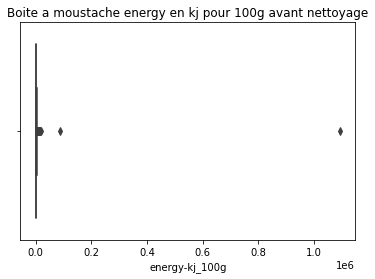

In [34]:
sns.boxplot(x='energy-kj_100g', data = openFood)
plt.title('Boite a moustache energy en kj pour 100g avant nettoyage')
plt.show()

In [35]:
df = openFood[openFood['energy-kj_100g']>3000]
df.sort_values(by = 'energy-kj_100g', ascending=False)[['code','product_name','quantity','categories','energy-kj_100g','energy-kcal_100g']].head(40)

,code,product_name,quantity,categories,energy-kj_100g,energy-kcal_100g
920198,37600057990089,Bruschetta,260g,en:sliced-breads,1094259.000,NaN
1592767,8809059294284,Yaki nori,"11 g, 0.39 oz, 5 sheets","Aliments et boissons à base de végétaux, Alime...",86200.000,20600.0
562286,25168242,barres noisettes et chocolat equitable,125g,"Snacks, Snacks sucrés, Barres, Barres de céréales",19295.748,4614.0
695995,3257983766370,Huile pizza,25cL,NaN,15473.400,3700.0
668474,3245413442000,Huile vierge de colza,75 cl,"Aliments et boissons à base de végétaux, Alime...",14080.794,3367.0
813333,3451790937781,beurre,NaN,NaN,12796.920,3060.0
1306846,7613413014569,Chocolat noir 87% Honduras,100 g,"Snacks, Snacks sucrés, Chocolats, Chocolats noirs",11262.126,2693.0
1282654,7610400014632,Chocolat Lindor White Lindt (100G),NaN,"Snacks, Sweet snacks, Chocolates",11249.580,2690.0
54070,0028400435031,Cheetos,NaN,NaN,11199.396,2678.0
1026930,4022192024585,Feuerkrainer,200 g,"Fleisch,Zubereitetes Fleisch,Würste,Deutsche W...",11089.600,267.2


In [36]:
#455146
#1448478577256
# on peut verifier les donnees par URL https://fr.openfoodfacts.org/produit/00039244
# on voit les bonnes valeurs peut etre interessant de les corriger ??? 

# on peut retrouver à l'URL des informations pour corriger 
## https://fr.openfoodfacts.org/produit/8809059294284
openFood.loc[1592767,'energy-kj_100g']=1897
openFood.loc[562286,'energy-kj_100g']=1930

# pas information on les drop
# stabilo BOSS https://fr.openfoodfacts.org/produit/4006381333634
indexDrop = openFood[openFood['code'].isin(['37600057990089','260383'])].index
openFood.drop(index = indexDrop, inplace=True)

In [37]:
df = openFood[openFood['energy-kj_100g']>3000]
df.sort_values(by = 'energy-kj_100g', ascending=True)[['code','product_name','quantity','categories','energy-kj_100g','energy-kcal_100g']].head(20)

,code,product_name,quantity,categories,energy-kj_100g,energy-kcal_100g
818486,3467740025576,Beurre aux 3 algues,200 g,"Produits laitiers, Produits à tartiner, Matièr...",3002.000,NaN
386804,0793052215989,Pili nuts,NaN,NaN,3002.676,718.0
971908,3760270950173,Noix de macadamia décortiquées,175 g,NaN,3002.676,718.0
798342,3418840720304,Marinade Provençale,NaN,NaN,3002.676,718.0
1613592,9110290207872,Mini Cups,NaN,NaN,3002.676,718.0
772565,3351700069062,Chipotle Mayonnaise,NaN,"Epicerie, Sauces, Mayonnaises",3002.676,718.0
770809,3350033311312,Boulgour tomate et olives vertes bio,NaN,NaN,3002.676,718.0
1237379,6009801544557,Macadamia butter,NaN,NaN,3002.676,718.0
565397,2600134035626,Noix du Brésil décortiquées,NaN,NaN,3002.676,718.0
759994,3332621012405,Beurre de Baratte,NaN,NaN,3002.676,718.0


In [38]:
df = openFood[openFood['energy-kj_100g']>3100]
df.sort_values(by = 'energy-kj_100g', ascending=True)[['code','product_name','quantity','categories','energy-kj_100g','energy-kcal_100g']].head(10)

,code,product_name,quantity,categories,energy-kj_100g,energy-kcal_100g
710893,3263859731717,Mayonnaise,190 g,"Epicerie, Sauces, Mayonnaises",3103.000,NaN
926494,3760030410008,Beurre de baratte,250 g,"Produits laitiers, Produits à tartiner, Matièr...",3103.044,742.0
872144,3588250000010,Beurre de montagne,NaN,"Produits laitiers, Produits à tartiner, Matièr...",3103.044,742.0
266140,0200963017910,Salade alaska,NaN,NaN,3103.044,742.0
1181457,5410056197749,Mayonnaise pomme,450 ml e,"Epicerie, Sauces, Mayonnaises",3103.044,742.0
881154,3596710463268,Mayonnaise aux olives vertes,125g,"Epicerie, Sauces, Mayonnaises",3103.044,742.0
937210,3760078780095,Beurre de la Chapelle Laurent,NaN,NaN,3103.044,742.0
1363363,8007885753214,Bio fru it,NaN,Confitures de fruits,3103.044,742.0
939306,3760089332184,Aïoli,NaN,"Epicerie, Sauces, Aïolis",3103.044,742.0
682139,3252260001014,Baumnüsse Grenoble 500G,500 g,NaN,3103.044,742.0


In [39]:
df = openFood[openFood['energy-kj_100g']>3200]
df.sort_values(by = 'energy-kj_100g', ascending=True)[['code','product_name','quantity','categories','energy-kj_100g','energy-kcal_100g']].head(10)

,code,product_name,quantity,categories,energy-kj_100g,energy-kcal_100g
786065,3384110008581,Graton,100 g,"Viandes, Charcuteries, Charcuteries diverses, ...",3201.000,NaN
815125,34564363,Melange quinoa,NaN,NaN,3203.412,766.0
274725,0206210006898,Pain cereale,NaN,NaN,3203.412,766.0
1520858,8437005628304,Gachas de la abuela,180 g,NaN,3203.412,766.0
693340,3257630001106,"Coudène, Aïoli, la verrine de 90 g",90g,NaN,3203.412,766.0
887801,3624875161023,Confiture d abricot,NaN,NaN,3207.594,767.0
954607,3760165982739,Sorbet au chocolat,NaN,NaN,3207.594,767.0
1143695,5060079730258,Sweet & spicy Mango sauce,NaN,NaN,3207.594,767.0
1516922,8437001706372,Perles d'ail,NaN,NaN,3207.594,767.0
1024430,4018462403105,Huile de coco,NaN,en:coconut-oils,3207.594,767.0


In [40]:
print(f'avant nettoayge {len(openFood)}')
index_energy_3000 = openFood[openFood['energy-kj_100g']>3200]
openFood = openFood.drop(index_energy_3000.index)
print(f'après nettoayge {len(openFood)}')

avant nettoayge 588263
après nettoayge 577743


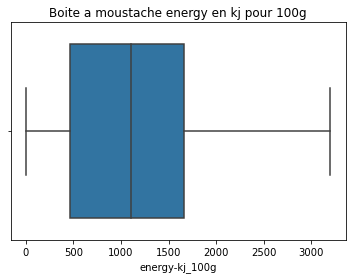

In [41]:
sns.boxplot(x='energy-kj_100g', data = openFood)
plt.title('Boite a moustache energy en kj pour 100g')
plt.show()

In [42]:
openFood['energy-kj_100g'].describe()

count    576105.000000
mean       1119.618068
std         735.243798
min           0.000000
25%         464.202000
50%        1099.866000
75%        1664.000000
max        3200.000000
Name: energy-kj_100g, dtype: float64

In [43]:
openFood['sugars_100g'].describe()

count    575580.000000
mean         14.187387
std          20.265133
min          -0.100000
25%           0.700000
50%           3.800000
75%          21.000000
max         100.000000
Name: sugars_100g, dtype: float64

In [44]:
openFood[openFood['sugars_100g']<0].head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,serving_quantity,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-lauric-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-gondoic-acid_100g,-erucic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,glycemic-index_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,somme_100
637618,3161712000928,http://world-en.openfoodfacts.org/product/3161...,melmax,2015-04-07 21:36:52,2015-04-07 21:36:52+00:00,2020-06-22 13:07:39,2020-06-22 13:07:39+00:00,Caprice des dieux,NaN,Fromage de France à pate molle,300g,"Carton,Frais","carton,frais",NaN,"Caprice des Dieux,Savencia","caprice-des-dieux,savencia","Produits laitiers, Produits fermentés, Produit...","en:dairies,en:fermented-foods,en:fermented-mil...","Dairies,Fermented foods,Fermented milk product...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"FR 49.107.001 EC,FR 52.247.001 EC","fr-49-107-001-ec,fr-52-247-001-ec","47.5,-0.3","cornille-les-caves-maine-et-loire-france,illou...","Houilles,France","Leclerc,Magasins U",France,en:france,France,"[_Lait_ de vache, _crème_, sel, ferments la...",[en:milk],NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,15.0,d,3.0,Milk and dairy products,Cheese,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,en:french-cheeses,French cheeses,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,1379.0,NaN,1379.0,NaN,

In [45]:
# en verifiant sur l'URL https://fr.openfoodfacts.org/produit/3161712000928 on ne peut pas corriger la valeur des sucres on supprime la donnée
openFood.drop(index = 637618, inplace=True)

In [46]:
openFood['fiber_100g'].describe()

count    130898.000000
mean          3.057422
std           5.007409
min           0.000000
25%           0.100000
50%           1.700000
75%           3.800000
max         100.000000
Name: fiber_100g, dtype: float64

In [47]:
openFood['proteins_100g'].describe()

count    576208.000000
mean          8.893220
std           9.964278
min           0.000000
25%           1.600000
50%           6.200000
75%          12.700000
max         100.000000
Name: proteins_100g, dtype: float64

In [48]:
openFood['salt_100g'].describe()

count    554903.000000
mean          1.263108
std           4.379877
min           0.000000
25%           0.080000
50%           0.540000
75%           1.300000
max         100.000000
Name: salt_100g, dtype: float64

## traitement des valeurs manquantes

In [49]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

def traitementNAN(df,colonne_target,colonnes_data):
    a_traiter = df[colonne_target].isna().sum()/len(df)*100
    print(f'La colonne {colonne_target} a {a_traiter:.2f} % de valeur manquantes à traiter')
    
    colonnes_total = colonnes_data
    colonnes_total.append(colonne_target)
    dataSampindex = df[df[colonne_target].notna()].sample(10000).index
    dataSamp = df.loc[dataSampindex,colonnes_total]
    dataSamp = dataSamp.dropna()
 
    data = dataSamp[colonnes_data]
    target = dataSamp[colonne_target]
    xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)
    
    knn = neighbors.KNeighborsRegressor(n_neighbors=5)
    knn.fit(xtrain, ytrain)
    #calcule de précision
    print('\tscore R^2 : ',knn.score(xtest, ytest))

    return knn.predict(df[colonnes_data].fillna(value=0))


In [50]:
colonne_a_compleler=['energy-kj_100g','fat_100g','saturated-fat_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g']

dico_colonne={}
dico_error={}
for i in range(0,len(colonne_a_compleler)):
    colonne_travail=colonne_a_compleler.copy()
    index = colonne_travail.pop(i)
    dico_colonne[index]=colonne_travail
    
for target, data in dico_colonne.items():
    target_pred = target+'_pred'
    openFood[target_pred] = traitementNAN(openFood,target,data) 



La colonne energy-kj_100g a 0.28 % de valeur manquantes à traiter
	score R^2 :  0.9999846446022594
La colonne fat_100g a 0.61 % de valeur manquantes à traiter
	score R^2 :  0.9504722113162803
La colonne saturated-fat_100g a 0.46 % de valeur manquantes à traiter
	score R^2 :  0.8466404788772437
La colonne sugars_100g a 0.37 % de valeur manquantes à traiter
	score R^2 :  0.9826449965970862
La colonne proteins_100g a 0.27 % de valeur manquantes à traiter
	score R^2 :  0.916642022568169
La colonne salt_100g a 3.95 % de valeur manquantes à traiter
	score R^2 :  0.7045686554964603
La colonne sodium_100g a 3.95 % de valeur manquantes à traiter
	score R^2 :  0.6721625482759148


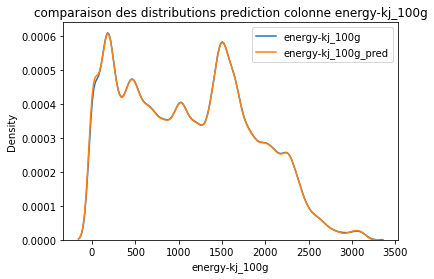

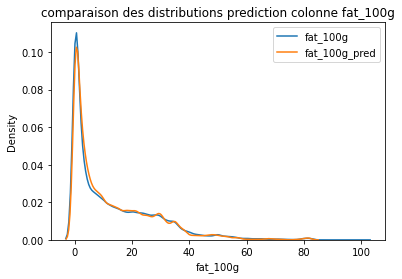

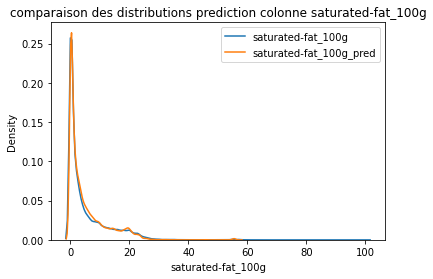

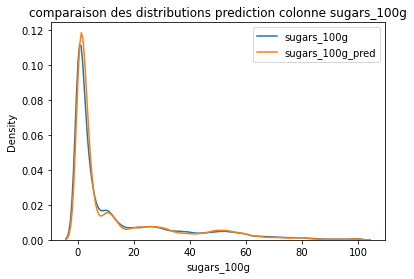

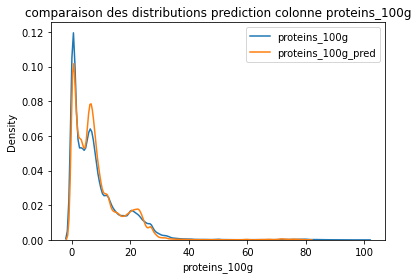

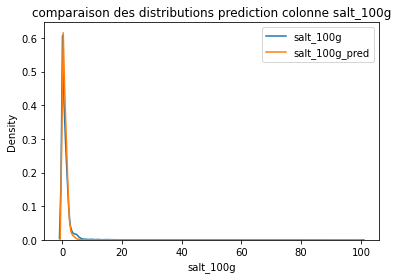

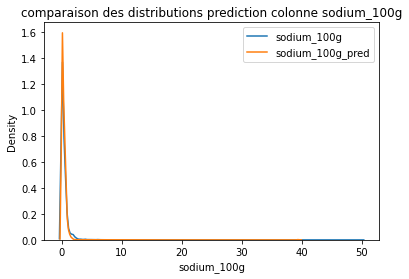

In [51]:
for target, data in dico_colonne.items():
    target_pred = target+'_pred'
    sns.kdeplot(target, data = openFood, label=target)
    sns.kdeplot(target_pred, data = openFood, label=target_pred)
    plt.title(f'comparaison des distributions prediction colonne {target}')
    plt.legend()
    fichier = 'predictg_'+target+'.png'
    plt.savefig(fichier)
    plt.show()


In [52]:
for target, data in dico_colonne.items():
    target_pred = target+'_pred'
    openFood[target].fillna(openFood[target_pred], inplace=True)


In [53]:
a_traiter = openFood['nutriscore_score'].isna().sum()/len(openFood)*100
print(f'La colonne nutriscore_score a {a_traiter:.2f} % de valeur manquantes à traiter')

a_traiter = openFood['nutriscore_grade'].isna().sum()/len(openFood)*100
print(f'La colonne nutriscore_grade a {a_traiter:.2f} % de valeur manquantes à traiter')


La colonne nutriscore_score a 55.74 % de valeur manquantes à traiter
La colonne nutriscore_grade a 55.74 % de valeur manquantes à traiter


In [56]:
def calcul_nutriscore(row):
    nutri_energy = int(row['energy-kj_100g']/335)
    nutry_sugars = int(row['sugars_100g']/4.5)
    nutri_fat = int(row['saturated-fat_100g']/335)
    nutri_sodium = int(row['sodium_100g']/90*1000) 
    nutri_prot = int(row['proteins_100g']/1.6) 
    nutri_fiber = int(row['fiber_100g']/0.9) 
    
    if nutri_energy<11:
        nutri = nutri_energy
    else:
        nutri = 10

    if nutry_sugars<11:
        nutri += nutry_sugars
    else:
        nutri += 10

    if nutri_fat<11:
        nutri += nutri_fat
    else:
        nutri += 10
    
    if nutri_sodium<11:
        nutri += nutri_sodium
    else:
        nutri += 10
        
    if nutri < 11:
        if nutri_prot<6:
            nutri -= nutri_prot
        else:
            nutri -= 5
    if nutri_fiber<6:
        nutri -= nutri_fiber
    else:
        nutri -= 5

    return nutri

openFood['nutriscore_score_pred'] = openFood[['energy-kj_100g','fat_100g','saturated-fat_100g','sugars_100g','proteins_100g','fiber_100g','sodium_100g']].fillna(0).apply(calcul_nutriscore, axis=1)

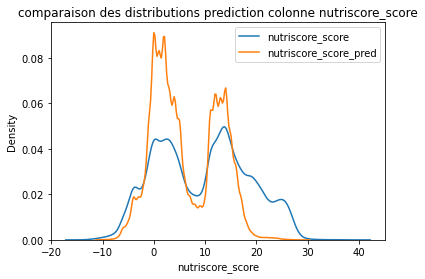

In [59]:
sns.kdeplot('nutriscore_score', data = openFood, label='nutriscore_score')
sns.kdeplot('nutriscore_score_pred', data = openFood, label='nutriscore_score_pred')
plt.title(f'comparaison des distributions prediction colonne nutriscore_score')
plt.legend()
fichier = 'predictg_nutriscore_score_pred.jpg'
plt.savefig(fichier)
plt.show()

openFood['nutriscore_score'].fillna(openFood['nutriscore_score_pred'], inplace=True)


In [61]:
len(openFood)

577742

In [62]:
# sauvegarde du fichier en fr.openfoodfacts.org.product_nettoye.csv
openFood.to_csv('fr.openfoodfacts.org.product_nettoye.csv', sep ='\t')